# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code.upper()  # Ensure country code is uppercase

    # If the city is unique, add to cities list
    if city_name not in [c["City"] for c in cities]:
        cities.append({"City": city_name, "Country": country_code})

# Print count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


In [7]:
print(type(cities))  # Should output <class 'list'>
print(len(cities))   # Should output the number of cities
print(cities[:5])    # Print first 5 cities to verify

<class 'list'>
628
[{'City': 'bethel', 'Country': 'US'}, {'City': 'gokwe', 'Country': 'ZW'}, {'City': 'kuraymah', 'Country': 'SD'}, {'City': 'jamestown', 'Country': 'SH'}, {'City': 'kodiak', 'Country': 'US'}]


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city_info in enumerate(cities):  # Ensure correct structure

    city = city_info["City"]
    country = city_info["Country"]
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city + "," + country  # Now includes country code

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}, {country}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        if city_weather["cod"] != 200:  # Check if API response is valid
            print(f"Skipping {city}, {country}: {city_weather['message']}")
            continue

        # Parse the JSON and retrieve data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except requests.exceptions.RequestException as e:
        print(f"Request failed for {city}, {country}: {e}")
    except KeyError:
        print(f"Skipping {city}, {country} - API response error: {city_weather}")

    # Pause to avoid rate limiting (1 request/sec recommended by OpenWeatherMap)
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bethel, US
Processing Record 2 of Set 1 | gokwe, ZW
Processing Record 3 of Set 1 | kuraymah, SD
Processing Record 4 of Set 1 | jamestown, SH
Processing Record 5 of Set 1 | kodiak, US
Processing Record 6 of Set 1 | margate, ZA
Processing Record 7 of Set 1 | metlili chaamba, DZ
Processing Record 8 of Set 1 | nadym, RU
Processing Record 9 of Set 1 | al mijlad, SD
Processing Record 10 of Set 1 | ushuaia, AR
Processing Record 11 of Set 1 | kapa'a, US
Processing Record 12 of Set 1 | nova sintra, CV
Processing Record 13 of Set 1 | saksaul'skiy, KZ
Skipping saksaul'skiy, KZ: city not found
Processing Record 14 of Set 1 | bilibino, RU
Processing Record 15 of Set 1 | atafu village, TK
Processing Record 16 of Set 1 | port-aux-francais, TF
Processing Record 17 of Set 1 | flying fish cove, CX
Processing Record 18 of Set 1 | hermanus, ZA
Processing Record 19 of Set 1 | mount isa, AU
Processing Record 20 of Set 1 | 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,-2.66,63,100,0.89,US,1739629267
1,gokwe,-18.2048,28.9349,26.19,62,100,0.82,ZW,1739629268
2,kuraymah,18.5500,31.8500,28.51,8,2,6.07,SD,1739629270
3,jamestown,-15.9387,-5.7168,21.22,77,65,6.99,SH,1739629036
4,kodiak,57.7900,-152.4072,2.73,93,100,2.06,US,1739629272


In [29]:
import os


output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


city_data_df.to_csv(f"{output_directory}/cities.csv", index_label="City_ID")

print("CSV file saved successfully!")

CSV file saved successfully!


In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,-2.66,63,100,0.89,US,1739629267
1,gokwe,-18.2048,28.9349,26.19,62,100,0.82,ZW,1739629268
2,kuraymah,18.5500,31.8500,28.51,8,2,6.07,SD,1739629270
3,jamestown,-15.9387,-5.7168,21.22,77,65,6.99,SH,1739629036
4,kodiak,57.7900,-152.4072,2.73,93,100,2.06,US,1739629272


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

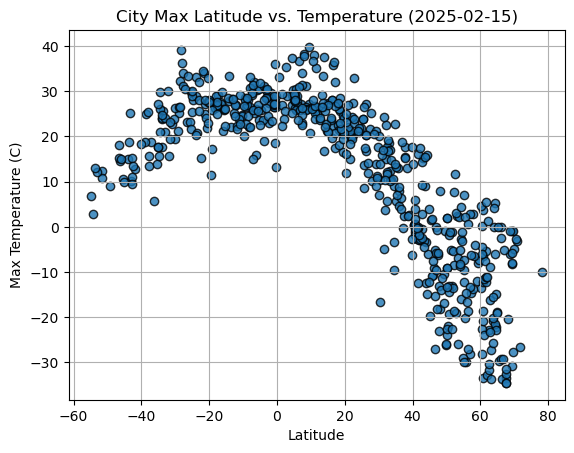

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

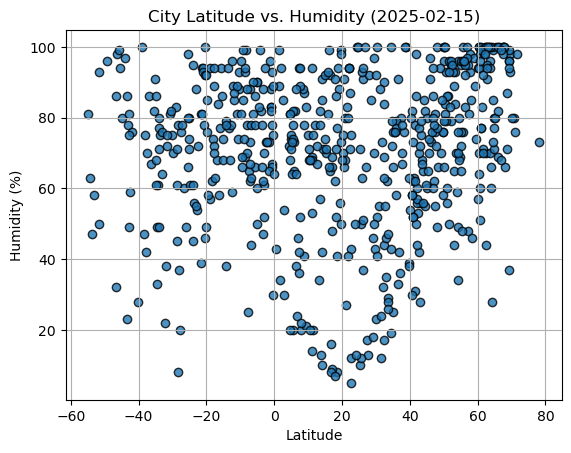

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

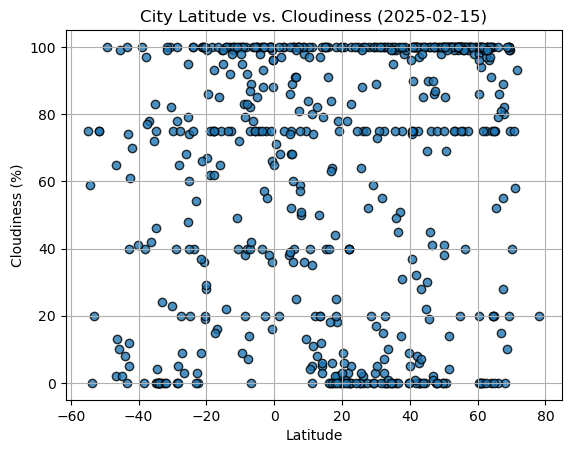

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

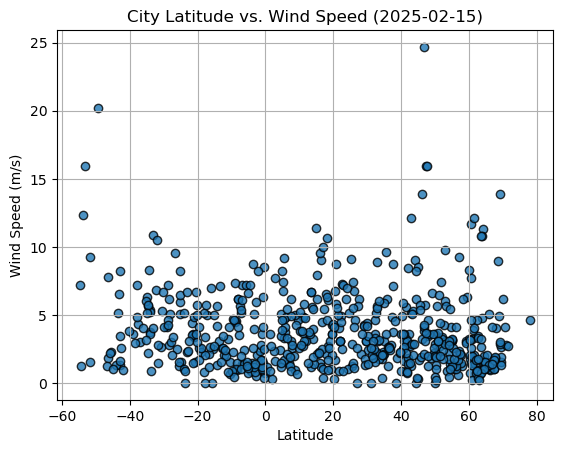

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,-2.66,63,100,0.89,US,1739629267
2,kuraymah,18.5500,31.8500,28.51,8,2,6.07,SD,1739629270
4,kodiak,57.7900,-152.4072,2.73,93,100,2.06,US,1739629272
6,metlili chaamba,32.2667,3.6333,22.52,17,0,4.63,DZ,1739629274
7,nadym,65.5333,72.5167,-29.59,100,52,1.25,RU,1739629275


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gokwe,-18.2048,28.9349,26.19,62,100,0.82,ZW,1739629268
3,jamestown,-15.9387,-5.7168,21.22,77,65,6.99,SH,1739629036
5,margate,-30.8636,30.3705,22.80,81,100,2.63,ZA,1739629243
9,ushuaia,-54.8000,-68.3000,6.81,81,75,7.20,AR,1739629277
13,atafu village,-8.5421,-172.5159,28.05,69,38,4.58,TK,1739629283


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7617638836496292


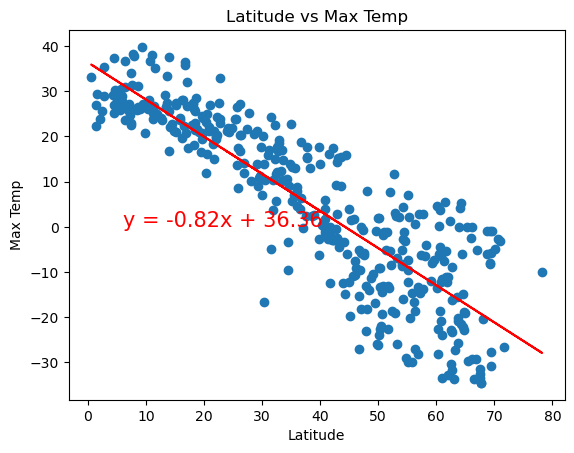

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^2-value is: 0.33127847334498367


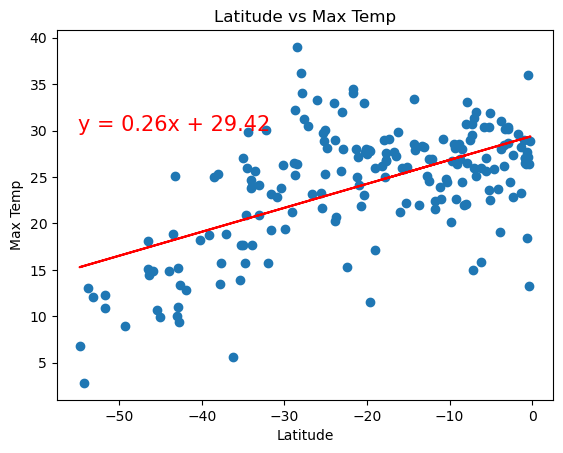

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

**Discussion about the linear relationship:** 
he scatter plot shows a positive correlation between latitude and max temperature. The equation 𝑦=
0.26
𝑥
+
29.42
y=0.26x+29.42 suggests that as latitude increases, temperatures tend to rise.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.11887405627280272


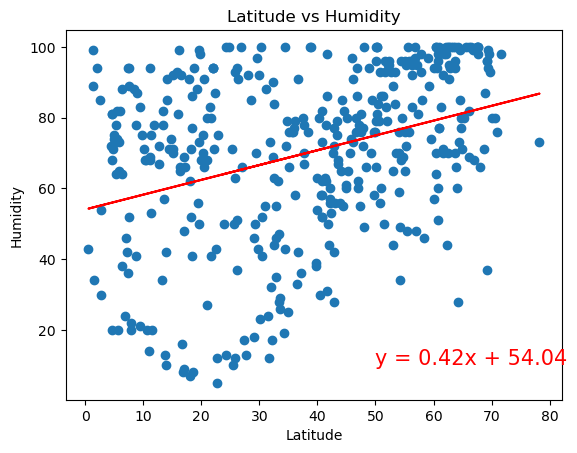

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,10))

The r^2-value is: 0.024339372201416725


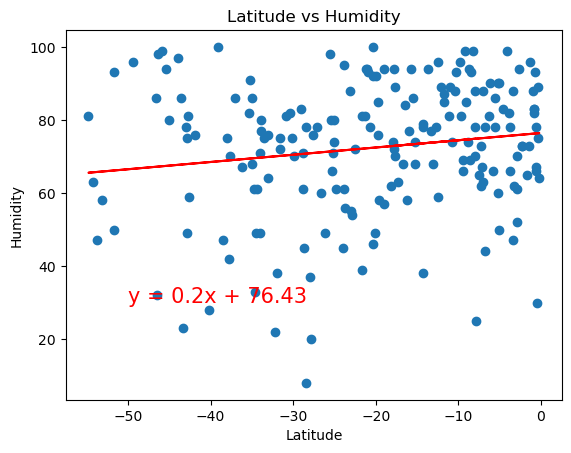

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** The scatter plot shows a weak positive correlation between latitude and humidity, as indicated by the equation 
𝑦
≈
0.2
𝑥
+
76.43
y≈0.2x+76.43. This suggests that humidity slightly increases as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03669208771392607


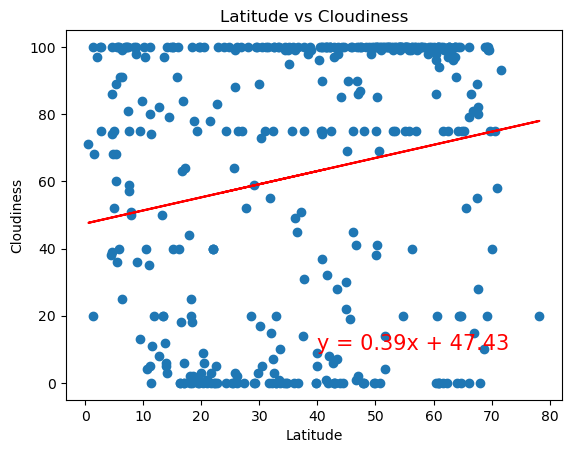

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r^2-value is: 0.1441366468204125


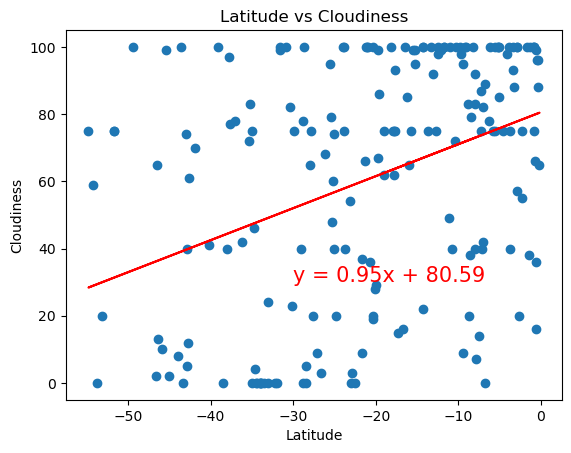

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** 
The scatter plot shows a moderate positive correlation between latitude and cloudiness, as indicated by the equation 
𝑦=
0.95
𝑥
+
80.59
y=0.95x+80.59. This suggests that cloudiness tends to increase as latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004079501607468154


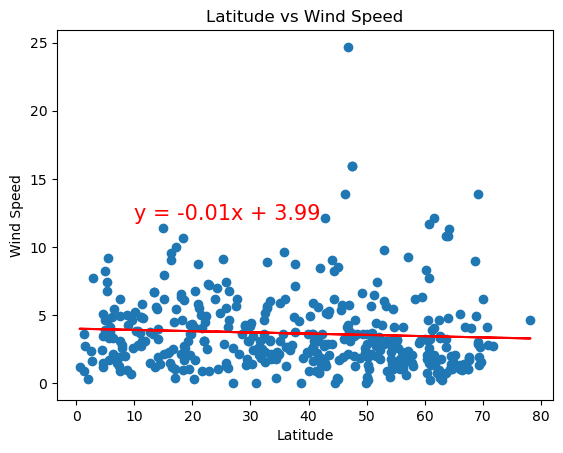

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r^2-value is: 0.08698114854401852


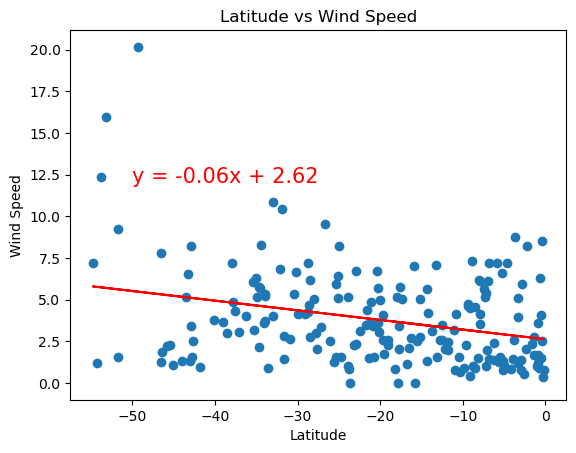

In [70]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The scatter plot shows a weak negative correlation between latitude and wind speed, as indicated by the equation 
𝑦=
−
0.06
𝑥
+
2.62
y=−0.06x+2.62. This suggests that wind speed slightly decreases as latitude increases.